<a href="https://colab.research.google.com/github/ella00100/Titanic/blob/main/Titanic_EDA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA(Exploratory Data Analysis)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c titanic
!ls

Saving kaggle.json to kaggle.json
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 27.8MB/s]
kaggle.json  sample_data  titanic.zip


In [3]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#null 데이터 확인인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

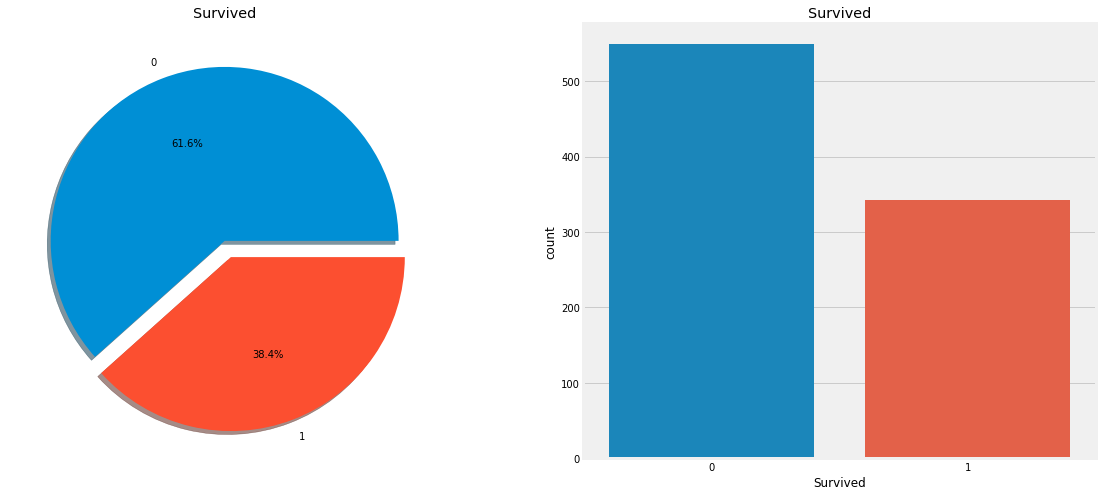

In [7]:
f,ax = plt.subplots(1,2,figsize=(18,8))

#생존 비율 파이그래프
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

#생존인원 막대그래프
sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

- traning set(891명) 중 약 350명만이 생존
- 전체 생존비율 38.4%

#1. Featrue

1. 범주형: Sex, Embarked
2. 순서형: PClass
3. 연속형: Age

# 1.1 Sex -> Categorical Feature

In [8]:
#성별 생존인원수수
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

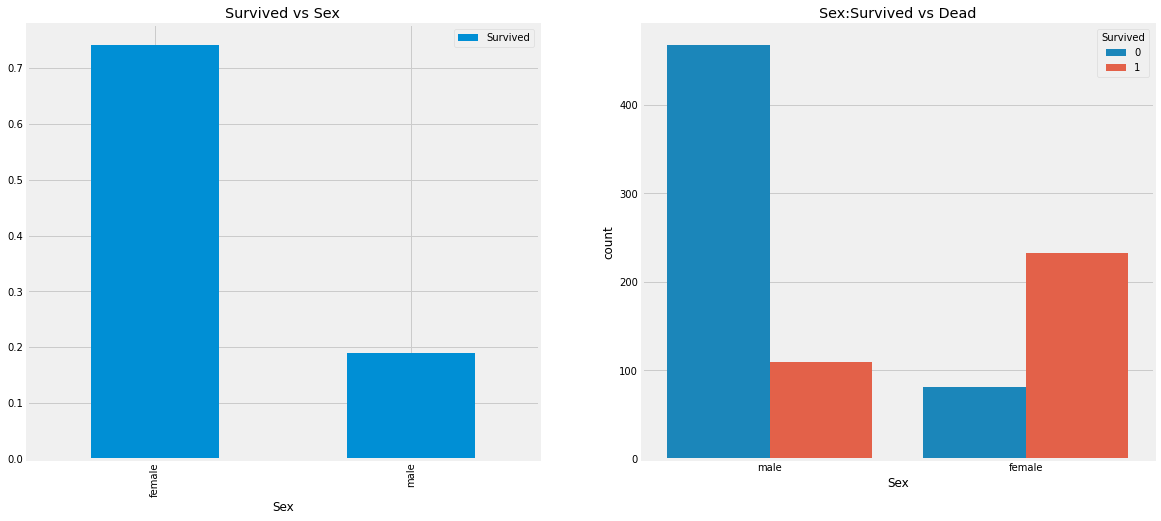

In [9]:
f, ax=plt.subplots(1,2,figsize=(18,8))

#성별 평균생존비율
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

#성별 생존인원수
sns.countplot(x='Sex',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- 배에 탄 남자의 수는 여자의 수보다 훨씬 많으나 구조된 여성의 수는 남성의 거의 두 배이다. 
- 배에 있는 여성의 생존율은 약 75%이고, 남성의 생존율은 18-19% 정도이다. 

# 1.2 Pclass -> Ordinal Feature

In [10]:
#Pclass와 Survived 간 crosstab

pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


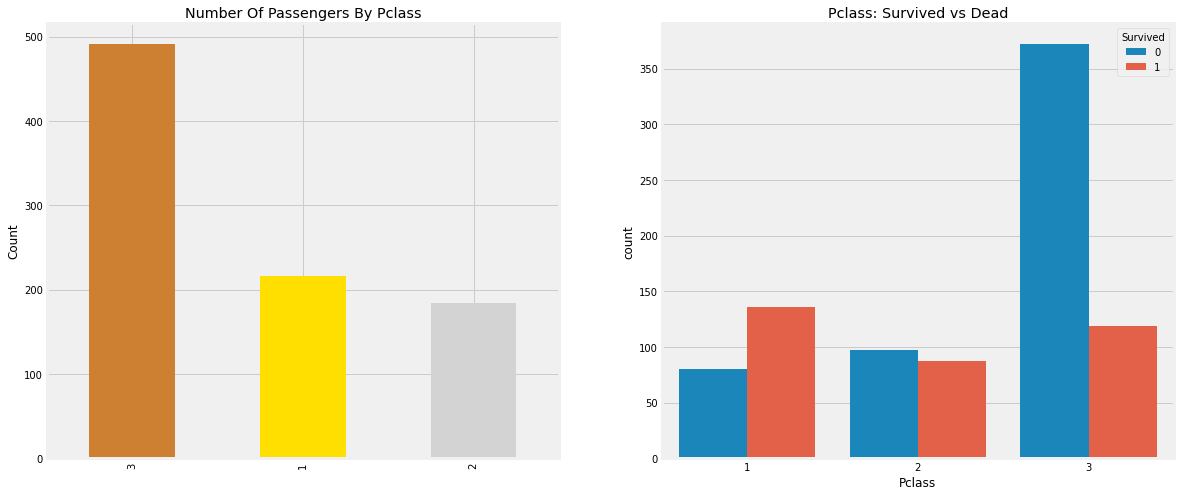

In [11]:
f, ax= plt.subplots(1,2,figsize=(18,8))

#Pclass별 탑승객수
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')

#Pclass별 생존/사망 인원수
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()


- 우리는 구조 작업에서 1등석 승객이 매우 높은 우선순위를 받았다는 것을 명확히 볼 수 있다. 

- 3등석 승객의 수가 훨씬 많았음에도 불구하고, 그들 중 생존자의 수는 약 25% 정도로 매우 낮았다.

- 1등석의 생존율은 약 63%이고, 2등석은 약 48%이다.





In [12]:
#성별/생존여부와 Pclass의 crosstab
pd.crosstab([data.Sex, data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

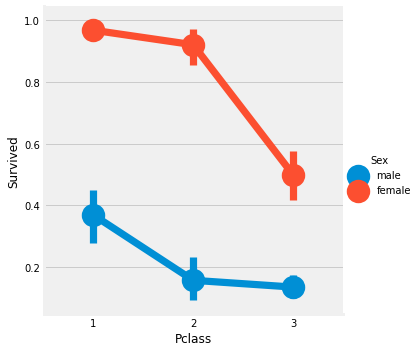

In [13]:
#pclass별/성별 생존비율
sns.catplot(x='Pclass',y='Survived', hue='Sex',kind='point', data=data)
plt.show()

- Pclass1의 여성들의 생존율이 약 95-96%
- Pclass와 상관없이, 여성들이 구조 작업 중에 최우선으로 대우받았다는 것이 분명하다.
-  Pclass1의 남성들도 생존율이 매우 낮습니다.

# 1.3 Age-> Continous Feature

In [14]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


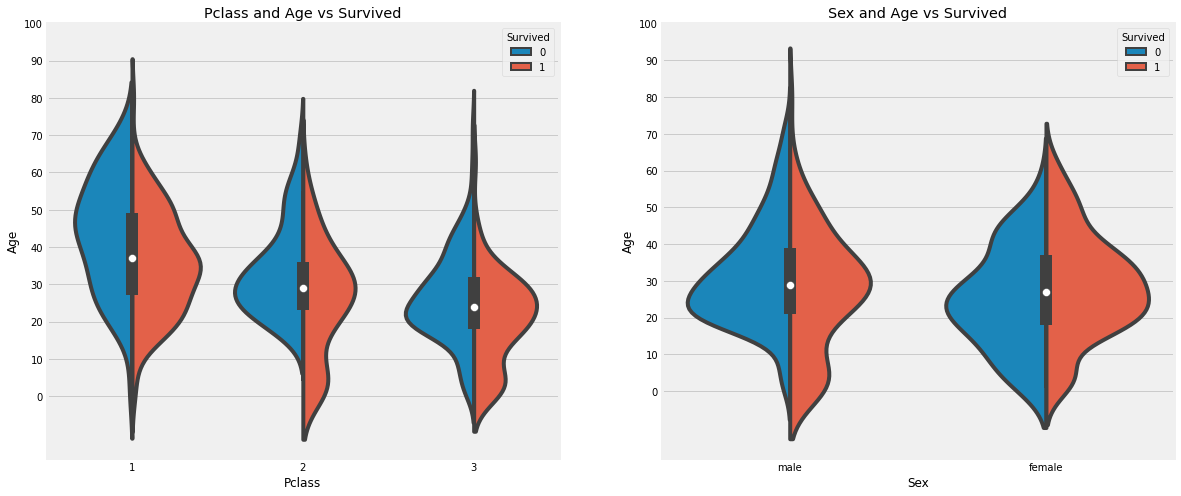

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))

#Pclass별, 나이 별 생존/사망 인원
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))

#성별, 나이별 생존/사망 인원
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))

plt.show()

- Pclass가 낮을수록 아이의 수가 증가하며, 10세 이하의 승객들의 생존율은 Pclass에 관계없이 좋아보임

- 20-50세의 승객 중 Pclass1에 있는 사람들의 생존 가능성이 높으며, 여성들은 더욱 더 좋아보입니다.

- 남성의 경우, 나이가 많아질수록 생존 가능성이 낮아짐

- 나이 기능은 177 개의 null 값을 가지고 있다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 연령을 할당할 수 있다.

- 하지만 문제는 다양한 연령대를 가진 많은 사람들이 있기 때문에, 4 세 아이에게 29 세의 평균 연령을 할당할 수는 없다.

- 우리는 이름 기능을 확인할 수 있다. 이 기능을 살펴보면, Mr 또는 Mrs와 같은 인사말이 있습니다. 따라서 각 그룹의 Mr와 Mrs의 평균 값을 해당 그룹에 할당할 수 있다..

In [16]:
#이름에서 인사말을 추출
data['Initial']=0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #알파벳 뒤 마침표를 찾아 initial 추출

pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [17]:
#일반적인 값으로 대체하기
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'
],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
#inplace=True 열 직접 수정


In [18]:
#initial 별 평균나이이
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
data.Age.isnull().any()

True

In [20]:
#Age의 Null 값들을 각각의 평균 값으로 대체체
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age']=46

#Null 값이 모두 대체되었는지 확인인
data.Age.isnull().any()

False

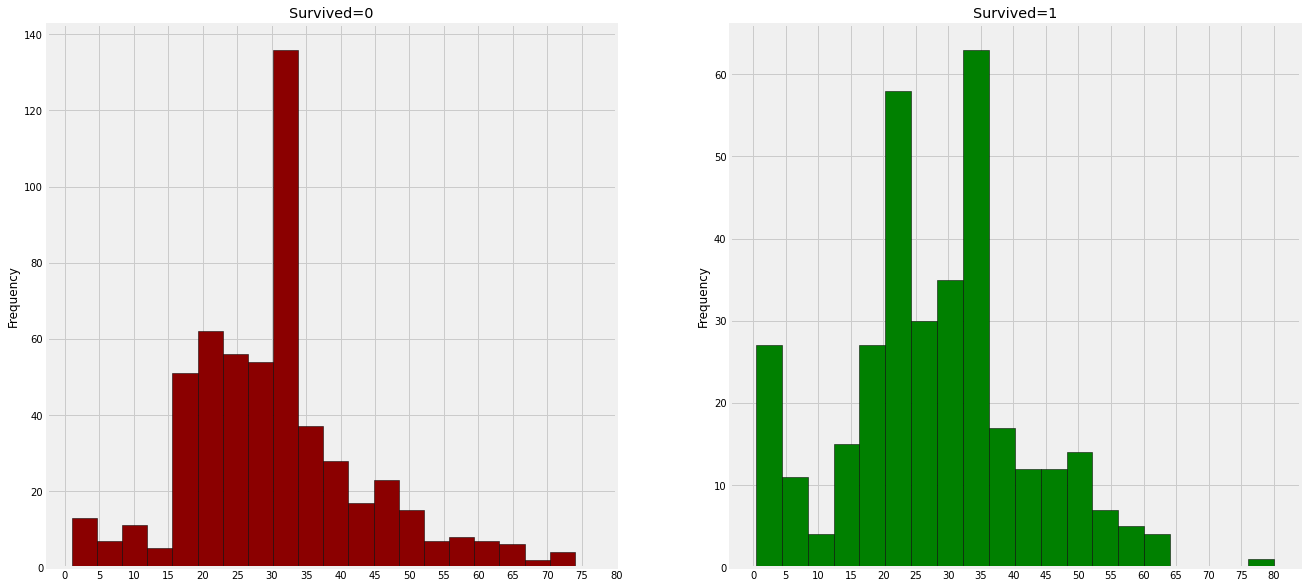

In [21]:
f, ax=plt.subplots(1,2,figsize=(20,10))

#나이별 사망자 수 히스토그램
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='darkred')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

#나이별 생존자 수 히스토그램
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()


- 유아(age<5)는 대량으로 구조되었다. (여성과 아동 우선 정책)

- 가장 나이가 많은 승객(80세)도 구조되었다.

- 최대 사망자 수는 30-40세 연령대에 있었다.

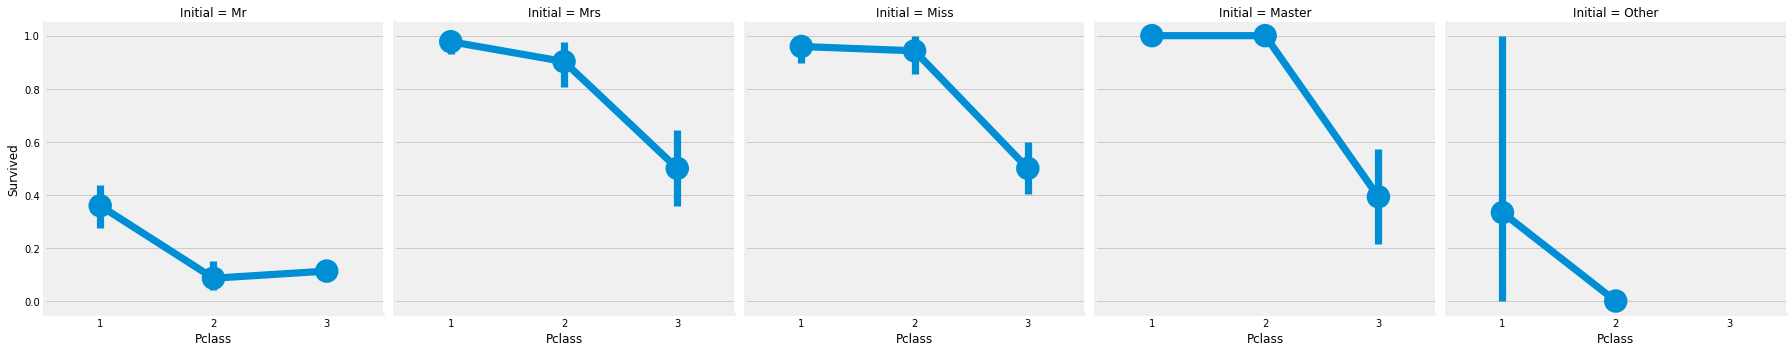

In [22]:
#각 name의 initial 마다의 pclass별 생존율 추이
sns.catplot(x='Pclass', y='Survived', col='Initial',kind='point', data=data)
plt.show()

# 1.4 Embarked -> Categrical Value

In [23]:
#Embarked', 'Pclass', 'Sex', 'Survived' 열의 교차표
pd.crosstab([data.Embarked, data.Pclass],[data.Sex, data.Survived], 
            margins=True).style.background_gradient(cmap='summer_r') 
            #margins=True :행/열별 합계추가

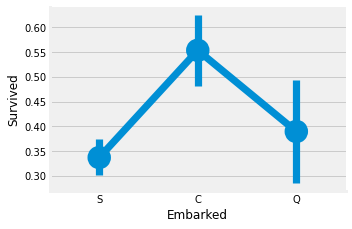

In [24]:
#탑승한 항구별 생존율
sns.catplot(x='Embarked', y='Survived', kind='point', data=data)

fig=plt.gcf() #현재 그림 객체를 가져와서서
fig.set_size_inches(5,3) #그림크기 설정

plt.show()


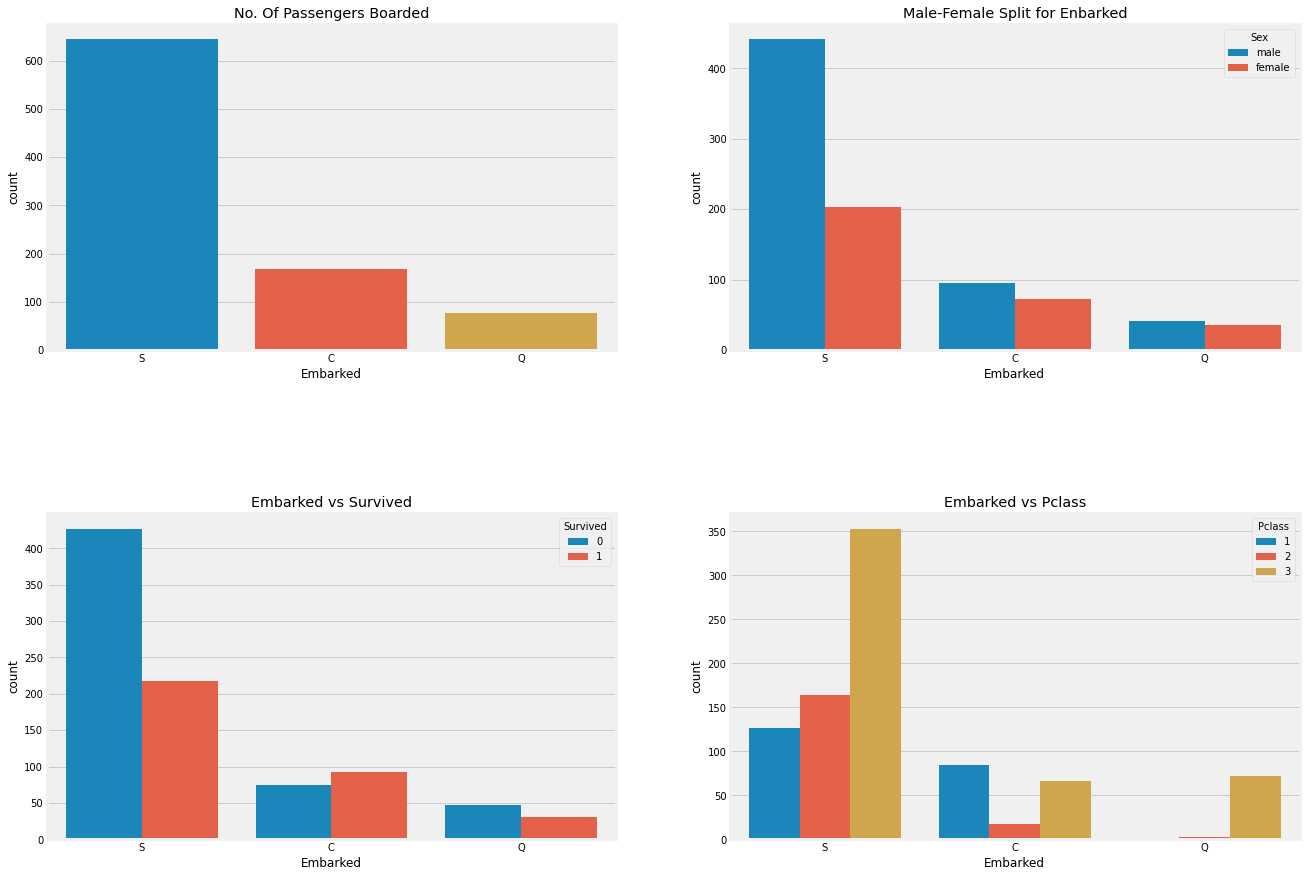

In [25]:
f, ax = plt.subplots(2,2,figsize=(20,15))

#탑승 항구 별 탑승인원
sns.countplot(x='Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

#탑승 항구 별 성별 탑승인원
sns.countplot(x='Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Enbarked')

#탑승 항구 별 생존/사망인원
sns.countplot(x='Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

#탑승 항구 별 Pclass 인원원
sns.countplot(x='Embarked',hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 가장 많은 승객이 S에서 탑승했다. 이들 중 대다수는 Pclass3 승객이다.

- C에서 온 승객은 상대적으로 많은 비율로 생존한 것으로 보인다. 이는 Pclass1 및 Pclass2 승객이 모두 구조되었기 때문일 수 있다.

- S 항구는 대부분의 부자들이 탑승한 곳으로 보인다. 그러나 생존 확률은 여전히 낮다. 이는 Pclass3 승객 중 약 81%가 생존하지 못했기 때문일 수 있다.

- Q 항구에서는 거의 95%의 승객이 Pclass3 이다.

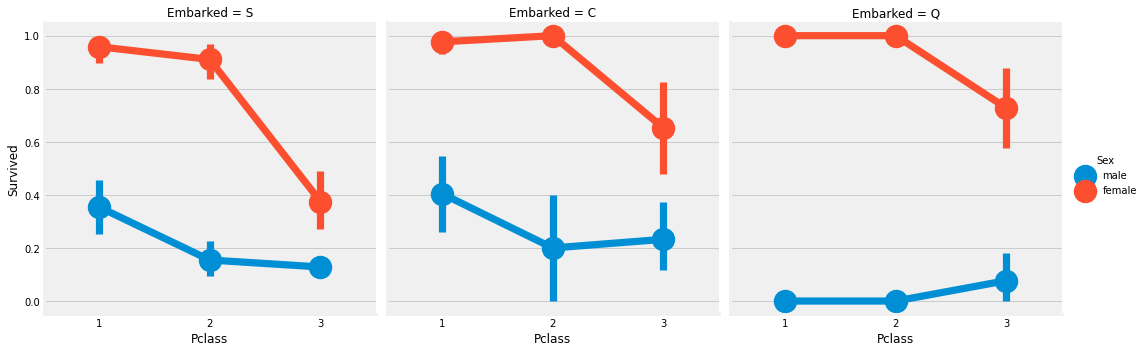

In [26]:
#각각의 탑승 항구의 Pclass 별 생존비율
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='point', data=data)
plt.show()

- Pclass1 및 Pclass2에 대한 여성의 생존 확률은 Pclass와 관계없이 거의 1이다.

- Pclass3 여성 및 남성 모두에 대한 생존율이 매우 낮아 보이는 것으로 보아 Port S는 Pclass3 승객에 대해 매우 불운한 것으로 보인다.

- Port Q는 대부분 Pclass 3에서 탑승한 남성들에게 가장 불운한 것으로 보인다.

In [27]:
#대부분의 승객이 S항구에서 탑승했으므로 Null데이터를 S로 대체
data['Embarked'].fillna('S', inplace=True)

data.Embarked.isnull().any()

False

# 1.5 SibSp -> Discrete Feature
Sibling : 형제 자매
Spouse : 배우자


In [28]:
#SibSp와 Survived 간 크로스 탭탭
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


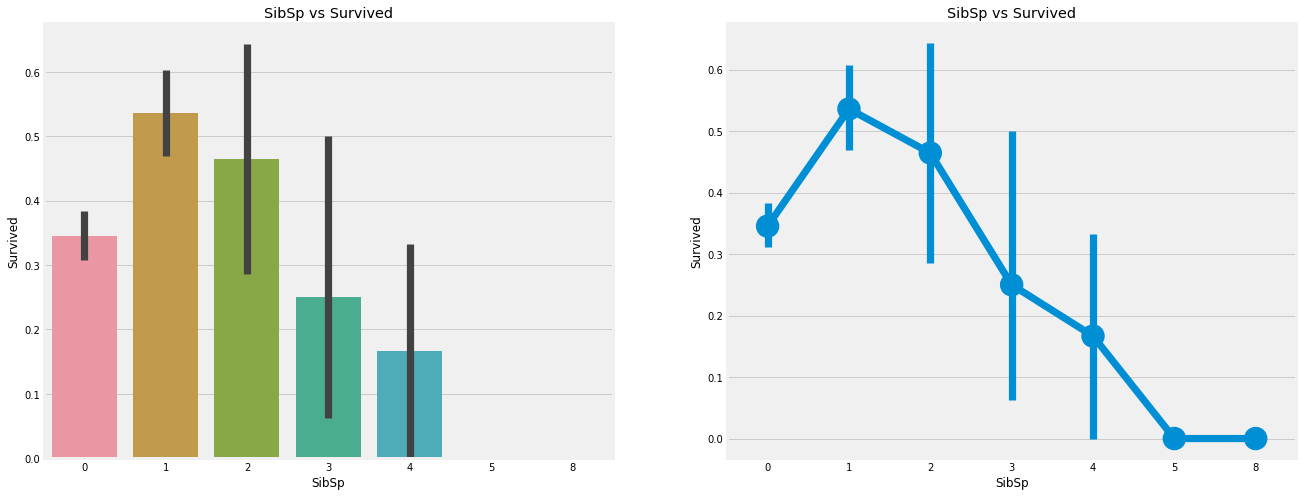

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot(x='SibSp',y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot(x='SibSp',y='Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.show()

In [30]:
#SibSp와 Pclass간 크로스탭
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


- 막대그래프와 팩터플롯을 통해, 형제자매 없이 혼자 탑승한 승객은 생존율이 약 34.5%인 반면, 형제자매의 수가 증가할수록 생존율이 대략적으로 감소하는 것으로 나타났다.

- 이는 가족이 함께 탑승할 경우, 자신보다 먼저 가족을 구하려고 노력할 가능성이 높기 때문으로 추측된다. 놀랍게도, 가족 구성원이 5명 이상인 경우 생존율은 0%이다

- 큰 가족(3명 이상) 모두 Pclass3에 속한 것으로 나타났다. Pclass3에 있는 모든 대가족이 사망했으므로, 이것이 그 이유일 것이다.

# 1.6 Parch
부모

In [31]:
#Parch와 Pclass 간 크로스탭탭
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


대가족은Pclass 3에 탑승한 것을 알 수 있음


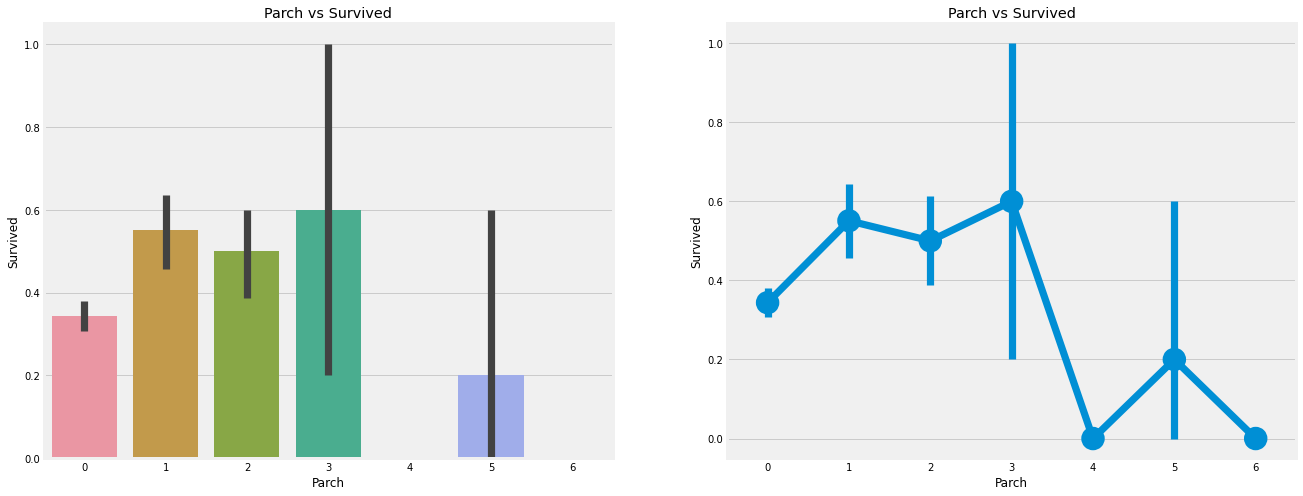

In [32]:
f, ax=plt.subplots(1,2,figsize=(20,8))

sns.barplot(x='Parch',y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot(x='Parch',y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

plt.show()

- 부모님이 함께 탑승한 승객은 생존 가능성이 더 높다. 그러나 부모의 수가 증가할수록 생존 가능성이 감소한다.

- 1-3명의 부모가 함께 탑승한 경우 생존 가능성이 높으며, 혼자인 경우 생존 가능성이 낮아지며, 4명 이상의 부모가 함께 탑승한 경우 생존 가능성이 더욱 감소한다.

# 1.6 Fare -> Continous Feature

In [33]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


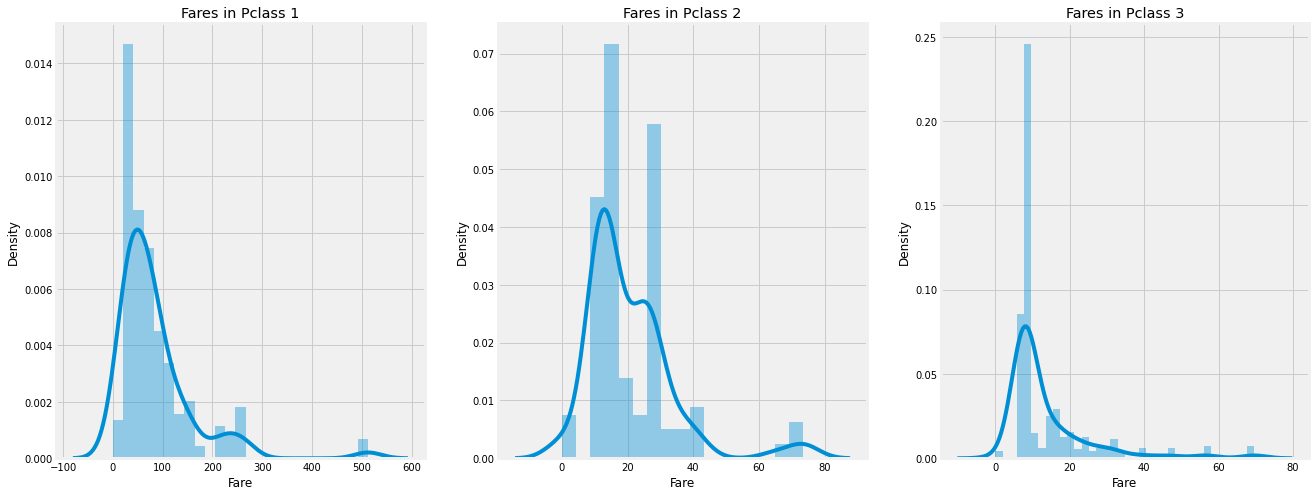

In [34]:
f,ax=plt.subplots(1,3,figsize=(20,8))

#Pclass 별 요금

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()


Pclass1에 속한 승객의 요금 분포가 큰 것으로 보이며, 이 분포는 등급이 낮아짐에 따라 감소한다. 이 값은 연속적이므로 binning을 사용하여 이산값으로 변환할 수 있다.

# Observations in Features

- Sex: 여성의 생존 가능성은 남성보다 높다.

- Pclass: 1등석 승객이 생존 가능성이 높은 경향이 있다. Pclass3의 생존율은 매우 낮다. 여성의 경우, Pclass1에서 생존 확률이 거의 1이며, Pclass2에서도 높다.

- Age: 5-10세 이하의 어린이는 생존 가능성이 높다. 15~35세 연령대의 승객들이 많이 사망했다.

- Embarked: C에서의 생존 가능성이 S보다 높아 보인다. Pclass1 승객의 대다수는 S에서 탑승한 승객이지만, C에서 탑승한 Pclass 1 승객의 생존 가능성이 높다. Q에서 탑승한 승객은 거의 대부분 Pclass3 승객이다다.

- Parch+SibSp: 1-2명의 형제자매, 배우자가 있는 경우 또는 1-3명의 부모가 있는 경우, 홀로 여행하거나 대가족이 함께하는 것보다 생존 가능성이 높다.



# Correleation Between The Features


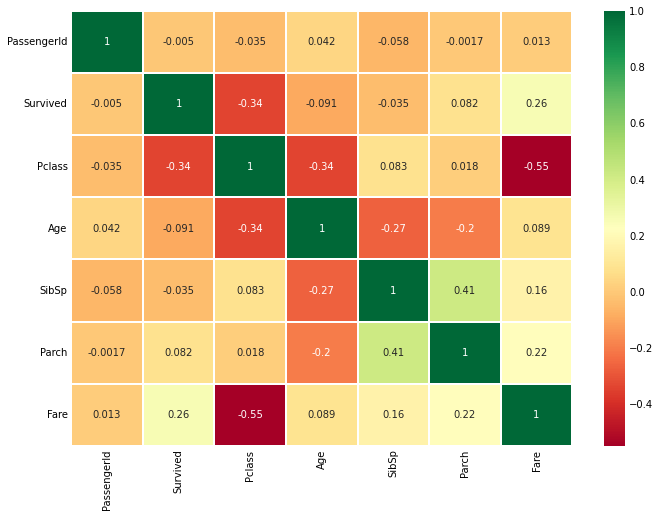

In [35]:
#특성 간 상관관계 분석 
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# 2. Feature Engineering and Data Cleaning

데이터셋에 피쳐가 주어졌을 때, 모든 피쳐가 중요한 것은 아닐 수 있다. 중복되는 피쳐가 많을 수도 있고, 다른 피쳐에서 정보를 추출하거나 관찰하여 새로운 피쳐를 얻을 수도 있다.

## 2.1 Age_band
나이에 따라 그룹화하라는 경우 연속적인 값들을 범주형 값으로 변환해야 한다. 

0-80 범위를 5개의 bin
bin size = 16

In [36]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [37]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


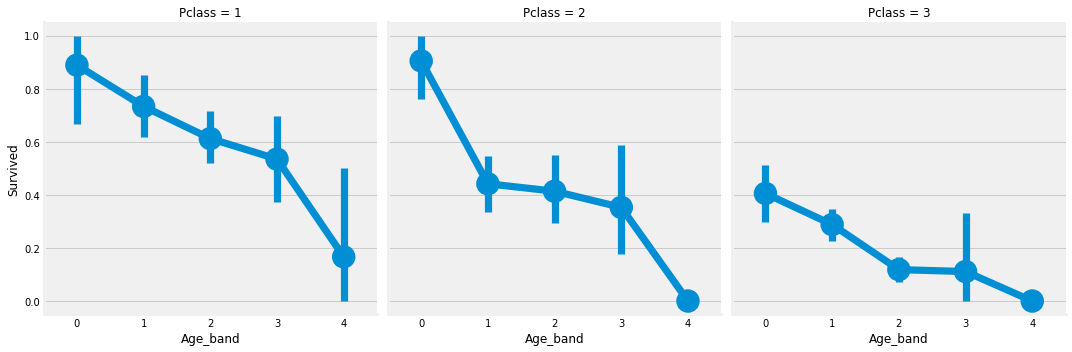

In [38]:
#Pclass 별 나이 구간에 따른 생존률
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass', kind='point')
plt.show()


## 2.2 Family_Size and Alone
family_size = Parch+SibSp

Alone = 혼자 왔는지의 여부(0/1)


In [39]:
#Family_Size와 Alone Feature 생성

data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1


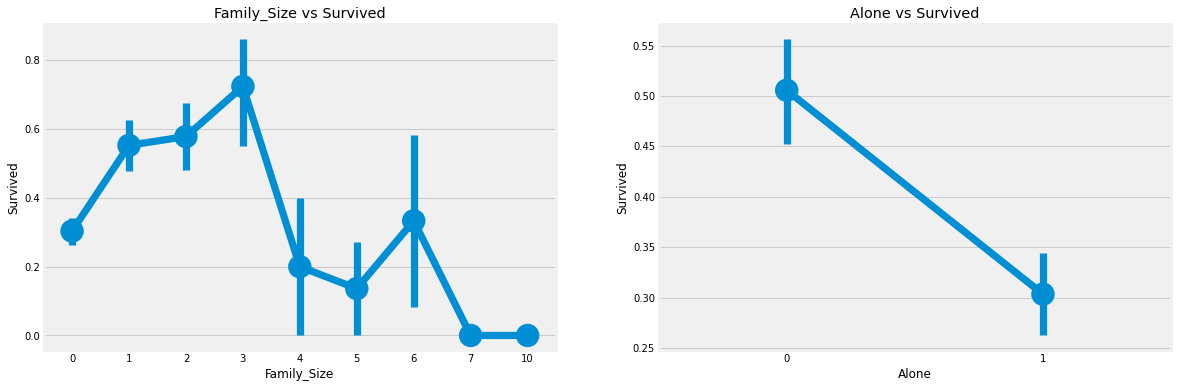

In [40]:
f,ax=plt.subplots(1,2,figsize=(18,6))

#가족의 수의 따른 생존 확률
sns.pointplot(x='Family_Size', y='Survived', data=data,  ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

#혼자인 경우와 아닌 경우의 생존 확률
sns.pointplot(x='Alone',y='Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

- 혼자인 경우 또는 가족 규모가 0인 경우 생존 가능성은 매우 낮다. 
- 가족 규모가 4 이상인 경우 생존 가능성도 감소한다.

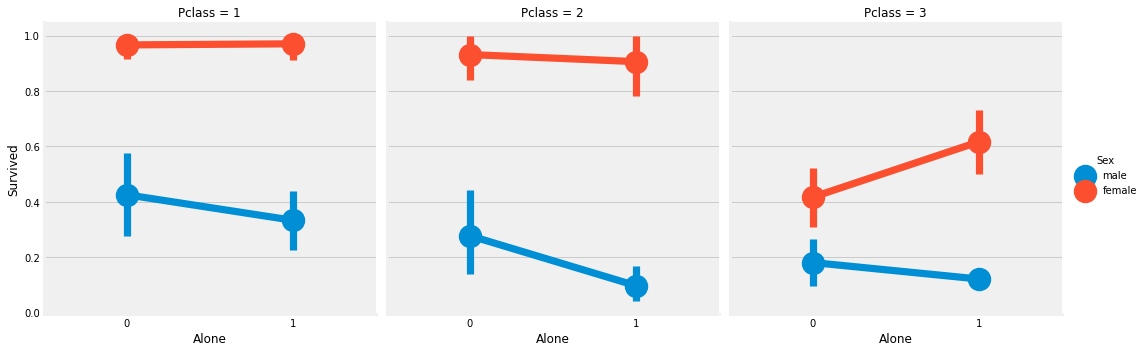

In [41]:
#Pclass 별 성별, 혼자인 경우와 아닌 경우의 생존 비율
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

- 일반적으로 혼자일 경우 성별이나 객실 등급에 관계없이 생존확률이 낮아진다. 

- 다만, Pclass3의 경우, 가족이 없는 여성의 생존 확률이 가족이 있는 여성보다 높다.

## 2.3 Fare_Range


In [42]:
#pd.qcut() 함수는 데이터를 quantile 기준으로 분류하여 범주형(categorical) 변수를 만들어준다.
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')


,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


- 요금이 증가할 수록 생존 확률도 증가

In [43]:
#요금을 범주에 따라 단일값으로 변환
data['Fare_cat']=0
data.loc[data['Fare']<=7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

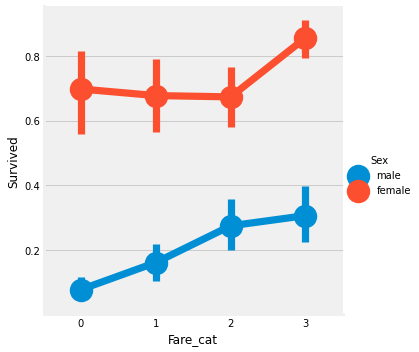

In [44]:
#Fare_cat에 따른 성별 생존률
sns.catplot(x='Fare_cat',y='Survived',data=data,hue='Sex', kind='point')
plt.show()

- 요금이 올라갈 수록 생존 가능성이 증가

## 2.4 Converting String Values into Numeric

In [45]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

## 2.5 Dropping UnNeeded Features
Name--> 이름은 어떤 범주형 값으로 변환할 수 없기 때문에 필요하지 않습니다.

Age--> Age_band feature이 있으므로 이 feature는 필요하지 않습니다.

Ticket--> 어떤 무작위 문자열이기 때문에 범주화할 수 없습니다.

Fare--> Fare_cat feature가 있으므로 이 feature는 필요하지 않습니다.

Cabin--> NaN 값이 많으며 많은 승객이 여러 개의 cabin을 가지고 있습니다. 따라서 이 feature는 쓸모가 없습니다.

Fare_Range--> Fare_cat feature가 있으므로 이 feature도 필요하지 않습니다.

PassengerId--> 범주화할 수 없습니다.

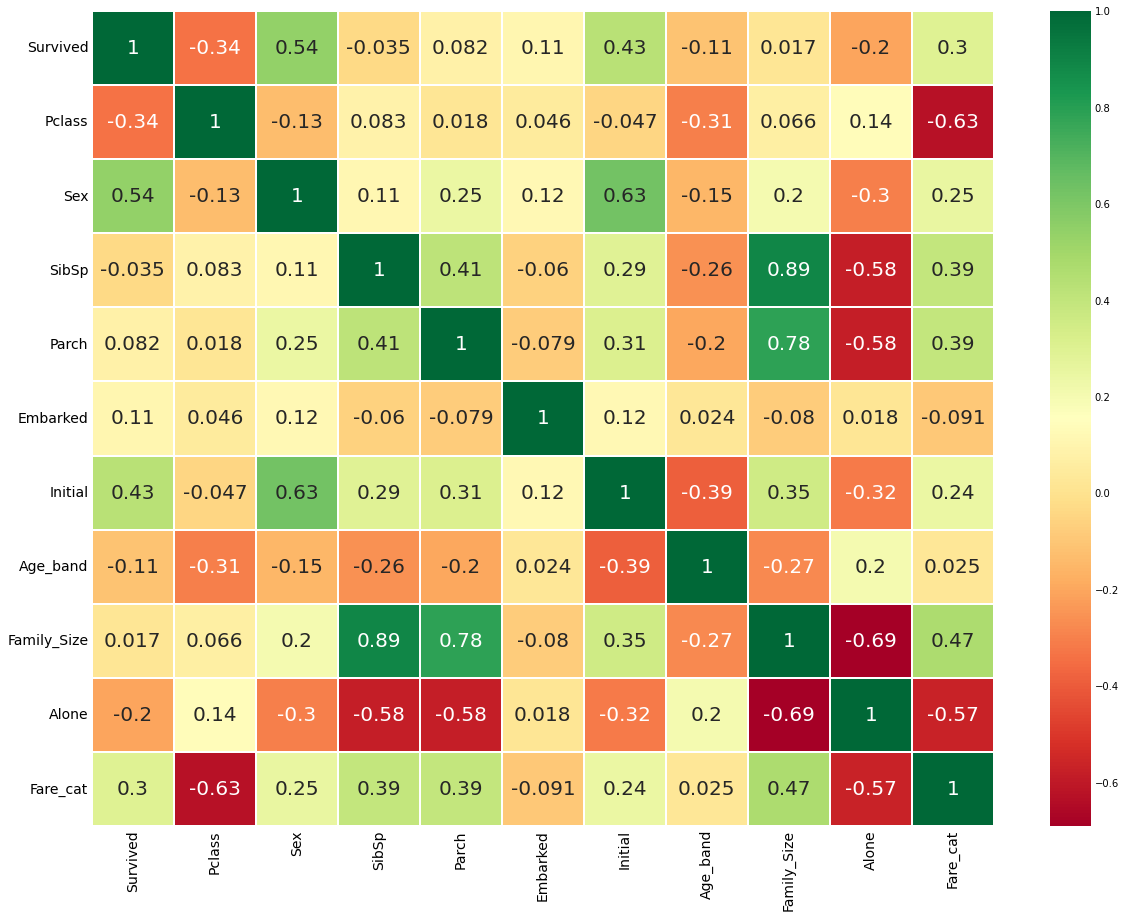

In [46]:
#feature 버리기기
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

#feature 간 상관관계 분석석
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# 3.Predictive Modeling

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [47]:
#ML package import
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [48]:
#데이터를 train set과 test set으로 분할할
train,test=train_test_split(data,test_size=0.3, random_state=0, stratify=data['Survived'])
#test set의 비율 = 30%, Survived 열을 기준으로 클래스 레이블을 균등 분할

#X=독립변수, Y=종속변수(Survived)
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]

test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]

X=data[data.columns[1:]]
Y=data['Survived']

##  3.1 Radial Support Vector Machines(rbf-SVM)
- 지도학습(Supervised Learning) 알고리즘 중 하나로, 분류(Classification) 또는 회귀(Regression) 분석에 사용된다. 

- SVM은 입력 데이터의 패턴을 학습하여 패턴을 구분하는 경계면(Decision Boundary)을 찾아내는 알고리즘

- rbf-SVM은 SVM에서 사용되는 kernel 중 하나로, 비선형(non-linear) 분류 문제를 해결할 수 있음.

In [49]:
# SVM 모델을 생성하는데, RBF 커널을 사용하며, C와 gamma 매개변수를 각각 1과 0.1로 설정
model=svm.SVC(kernel='rbf', C=1, gamma=0.1)

#train_X와 train_Y 데이터를 사용하여 모델을 학습
model.fit(train_X,train_Y)

#test_X 데이터를 사용하여 모델을 예측하고, 예측값을 prediction1에 저장
prediction1=model.predict(test_X)

#예측값과 test_Y의 실제값을 비교하여 정확도를 계산
print('Accuracy for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is  0.835820895522388


## 3.2 Linear Support Vector Machine(linear-SVM)

In [50]:
# SVM 모델을 생성, linear 커널 사용
model=svm.SVC(kernel='linear', C=0.1, gamma=0.1)

#train_X와 train_Y 데이터를 사용하여 모델을 학습
model.fit(train_X,train_Y)

#test_X 데이터를 사용하여 모델을 예측하고, 예측값을 prediction1에 저장
prediction2=model.predict(test_X)

#예측값과 test_Y의 실제값을 비교하여 정확도를 계산
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


### 3.3 Logistic Regression


In [51]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logitstic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logitstic Regression is 0.8134328358208955


## 3.4 Decision Tree

In [52]:
model=DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8022388059701493


## 3.5 K-Nearest Neighbours(KNN)

In [53]:
model=KNeighborsClassifier()
model.fit(test_X, test_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8246268656716418


- KNN 모델의 정확도는 n_neighbors 매개변수의 값에 따라 변경됩니다. 기본값은 5입니다. n_neighbors의 다양한 값을 사용하여 정확도를 평가해보자

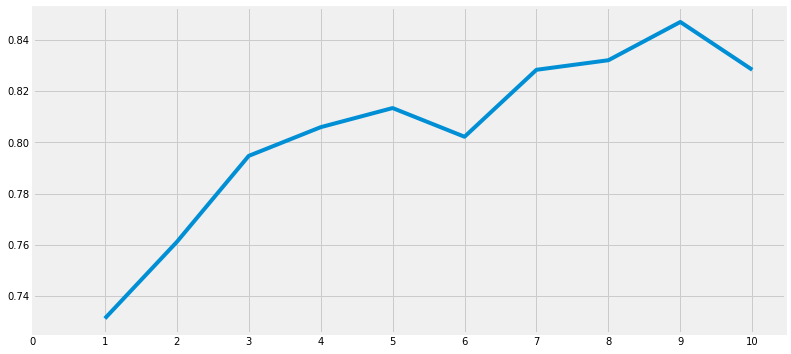

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [54]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

## 3.6 Gaussian Naive Bayes

In [55]:
model=GaussianNB()
model.fit(train_X, train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


## 3.7 Random Forests

In [56]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8171641791044776


- 모델의 정확도는 분류기의 견고성을 결정하는 유일한 요소가 아니다. 

- 예를 들어, 분류기가 훈련 데이터를 기반으로 학습되어 테스트 데이터에서 90%의 정확도를 얻은 경우, 이는 분류기의 정확도가 매우 높은 것으로 보일 수 있다. 

- 그러나 이러한 정확도가 새로운 모든 테스트 데이터에 대해 90%를 보장하는지 확신할 수 없다.
 
- 왜냐하면 분류기가 자기자신을 학습하는 데 사용할 모든 인스턴스를 결정할 수 없기 때문이다. 

- 훈련 및 테스트 데이터가 변경됨에 따라 정확도도 변경된다 -> 모델 분산(model variance)

- 이러한 문제를 극복하고 일반화된 모델을 얻기 위해 교차 검증(Cross Validation)을 사용한다다.





# 4. Cross Vaildation

- 데이터가 불균형할 경우, 즉 클래스1의의 인스턴스 수는는 많지만 다른 클래스 인스턴스 수가 적을 수 있다. 따라서 데이터 집합의 모든 인스턴스에서 알고리즘을 훈련하고 테스트해야 한다. 그런 다음 데이터 집합의 모든 기록된 정확도의 평균을 취할 수 있다.

- K-Fold 교차 검증은 데이터 집합을 k-서브셋으로 나누어 시작한다.

- 예를 들어 데이터 집합을 (k=5) 부분으로 나누면, 하나의 부분은 테스트에 예약하고 다른 4 부분을 사용하여 알고리즘을 훈련한다.

- 다음 반복에서는 테스트 부분을 변경하고 다른 부분에서 알고리즘을 훈련한다. 정확도와 오류는 평균화되어 알고리즘의 평균 정확도를 얻는다. 이를 K-Fold 교차 검증이라고 한다.

- 알고리즘이 일부 훈련 데이터에 대해 데이터 세트를 과소적합(underfit)할 수도 있고 다른 훈련 세트에서 데이터를 과적합(overfit)할 수도 있다. 따라서 교차 검증을 사용하면 일반화된 모델을 얻을 수 있다.


In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

#K-Fold Cross Vaildaition을 이용하여 다양한 분류 알고리즘의 정확도 계산, 결과를 표로 나타내기
kfold = KFold(n_splits=10, shuffle=True, random_state=22) #n_splits = k값, radom_state=임의의 seed값값
xyz=[]
accuracy=[]
std=[]

#분류 알고리즘과 이에 대한 라벨을 리스트로 지정
classifiers=['Linear Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models=[svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100) ]

#K-Fold Cross Validation 수행
for i in models:
  model = i
  cv_result = cross_val_score(model,X,Y, cv = kfold, scoring="accuracy")
  cv_result=cv_result
  xyz.append(cv_result.mean()) #평균 정확도
  std.append(cv_result.std())  #표준 편차
  accuracy.append(cv_result)   #정확도도

new_models_dataframe2=pd.DataFrame({'CV Mean': xyz, 'Std':std}, index=classifiers)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.803608,0.044649
Naive Bayes,0.795843,0.054861
Random Forest,0.812622,0.047423


<Axes: >

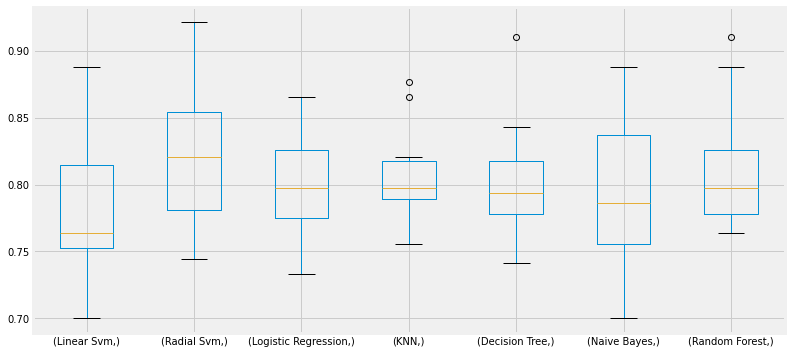

In [58]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

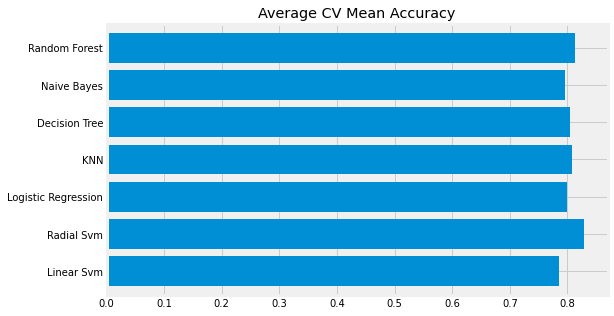

In [59]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- 분류 정확도는 때때로 불균형으로 인해 잘못된 요약 결과를 제공할 수 있다. 

- 혼동 행렬을 사용하여 모델이 잘못된 방향으로 간 곳을 보거나 모델이 잘못 예측한 클래스를 볼 수 있다.

# 5. Confusion Matrix
분류기(classifier)가 정확하게 분류한 경우와 그렇지 않은 경우의 개수를 나타내는 행렬

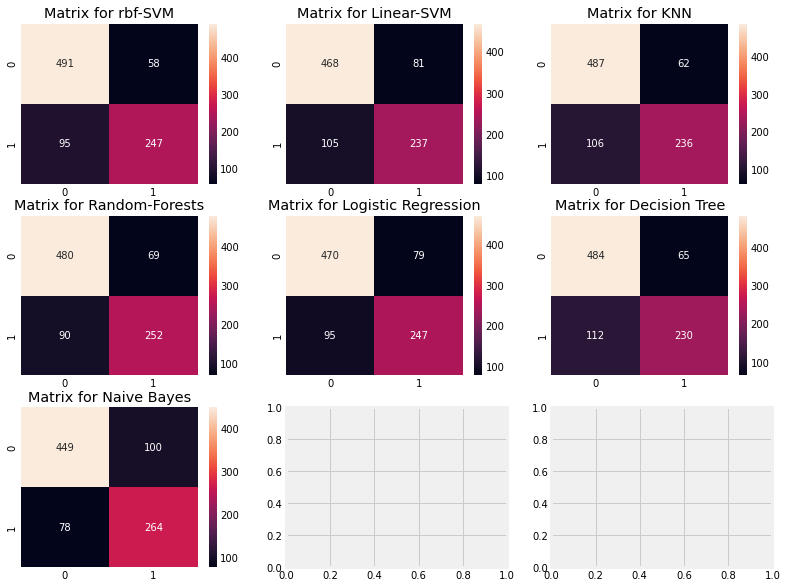

In [60]:
f,ax = plt.subplots(3,3,figsize=(12,10))

#rbf-SVM
#cross_val_predict(): 교차검증수행, 예측 값 구함
y_pred=cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10) 
#confusion_matric(): 실제 값과 예측 값 비교
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f') 
ax[0,0].set_title('Matrix for rbf-SVM')

#linear-SVM
y_pred=cross_val_predict(svm.SVC(kernel='linear'),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

#KNN
y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

#Random-Forests
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

#Logistic Regression
y_pred=cross_val_predict(LogisticRegression(),X,Y, cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

#Decision Tree
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

#Naive Bayes
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()



- 왼쪽 대각선은 각 클래스에 대해 올바른 예측의 수를 보여주며 오른쪽 대각선은 잘못된 예측의 수를 보여줌

- rbf-SVM
    - 올바른 예측의 수는 각각 491 (사망) + 247 (생존)이며, 평균 CV 정확도는 (491 + 247) / 891 = 82.8 %

    - 오류--> 58 명의 사망자를 생존자로 잘못 분류하고 95 명의 생존자를 사망자로 잘못 분류, 따라서 사망자를 생존자로 잘못 예측하여 더 많은 오류를 범함.

- 모든 행렬을 살펴보면, rbf-SVM은 사망한 승객을 올바르게 예측할 가능성이 더 높지만, NaiveBayes는 생존한 승객을 올바르게 예측할 가능성이 더 높다.

# 6. Hyper-Parameters Tunning

- 머신러닝 모델은 검은 상자(black box)와 같다. 이 검은 상자에는 기본 매개 변수 값이 있으며, 우리는 이를 조정하거나 변경하여 더 나은 모델을 얻을 수 있다. 

- 예를 들어 SVM 모델의 C와 감마와 같이 다른 분류기에 대한 서로 다른 매개 변수는 하이퍼 매개 변수(hyper-parameters)라고하며, 이를 조정하여 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있다. 이를 하이퍼파라미터 튜닝(Hyper-Parameter Tuning)이라고한다.

### 6.1 SVM

In [61]:
#SVM hyper-parameter tunning
from sklearn.model_selection import GridSearchCV

#C,gamma,kernel에 대한 후보값 설정
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf', 'linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}

#GridSearchCV를 사용하여 hyper 파라미터의 조합들을 테스트
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper, verbose=True)
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


## 6.2 Random Forests

In [62]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}

gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


- The best score for Rbf-Svm is 82.83% with C=0.4 and gamma=0.3. 
- For RandomForest, score is abt 81.9% with n_estimators=300.

# 7. Ensembling(앙상블)
- 앙상블은 모델의 정확도나 성능을 높이는 좋은 방법이다. 

- 여러 가지 간단한 모델을 결합하여 하나의 강력한 모델을 만드는 것.

- 예를 들어, 우리가 스마트폰을 사고자 하고 다양한 매개변수를 기반으로 많은 사람들에게 물어본다면, 우리는 모든 다른 매개변수를 분석한 후 단일 제품에 대한 강력한 판단을 내릴 수 있다.

## 7.1 Voting Classifier

보팅 분류기는 매우 다른 간단한 머신 러닝 모델의 예측을 결합하여 평균 예측 결과를 제공한다. 

하위 모델 또는 베이스 모델은 모두 다른 유형이다.

In [63]:
from sklearn.ensemble import VotingClassifier

#7개의 분류기를 사용하여 VotingClassifier 생성 
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y) #'soft' 확률값을 이용

#ensemble_lin_rbf.score : 앙상블 모형의 정확도
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))

#cross_val_scre를 이용하여 10-fold cross validation 수행, 평가 지표 = 'accuracy'
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())

The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


## 7.2 Bagging
데이터 집합의 작은 파티션에서 유사한 분류기를 적용하고 모든 예측의 평균을 취함으로써 작동.

평균화로 인해 분산이 감소. Voting Classifier와 달리 Bagging은 유사한 분류기를 사용.


### Bagged KNN

  Bagging은 분산이 높은 모델에 가장 잘 작동한다. 이에 대한 예로는 Decision Tree나 Random Forests가 있다. 작은 n_neighbours 값으로 KNN을 사용할 수 있다.

In [65]:
from sklearn.ensemble import BaggingClassifier

#Bagging Classifier를 사용하여 KNN모델 ensemble
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))

result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())#평균정확도

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


### Bagged DecisionTree

In [69]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))

result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:', result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## 7.3 Boosting
순차적인 분류기 학습을 이용한 앙상블 기법

약한 모델의 점진적인 향상

- 전체 데이터셋에서 모델을 학습 
: 이제 모델은 일부 인스턴스를 올바르게 예측할 수 있지만, 일부 인스턴스는 잘못 예측할 수도 있다. 

- 다음 반복에서 학습자는 잘못 예측된 인스턴스에 더 많은 초점을 두거나 더 많은 가중치를 부여한다. 따라서 잘못 예측된 인스턴스를 올바르게 예측하려고 노력한다. 

- 이러한 반복적인 과정은 새로운 분류기가 모델에 추가될 때까지 계속되며, 정확도가 한계에 도달할 때까지 이어진다.

### AdaBoost(Adaptive Boosting)
적응형 부스팅

- 이 경우 약한 학습자 또는 추정기는 Decision Tree이다. 그러나 우리는 기본 추정기를 우리가 선택한 어떤 알고리즘으로도 변경할 수 있다.

In [72]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.1)
result=cross_val_score(ada, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


### Stochastic Gradient Boosting
weak learner가 Decision Tree인 Boosting 기법

-일부 데이터만 사용하여 각 Tree 모델링을 진행하는 기법으로 더욱 빠르게 좀 더 일반화된 모델링이 가능

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

grad=GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10, scoring='accuracy')

print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


### XGBoost(eXtreme Gradient Boosting)
대량의 데이터셋에서 높은 예측 정확도와 실행 속도를 제공하는 분산형 그래디언트 부스팅 프레임워크

In [75]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


### Hyper-Parameter Tuning for AdaBoost
 AdaBoost로 가장 높은 정확도를 얻었다. 이제 하이퍼파라미터 튜닝으로 정확도를 더 높여보자.

In [77]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]

#n_estimators와 learning_rate의 값들을 조합하여 모델을 여러번 학습, 최적하이퍼파라미터 찾기
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_) #모델의 검증 정확도
print(gd.best_estimator_) #최적의 모델

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


## 8.Confusion Matrix for the Best Model




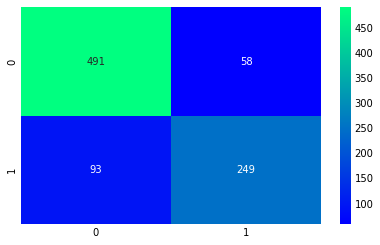

In [79]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.1)
result=cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter', annot=True, fmt='2.0f')
plt.show()

#9.Feature Importance
모델에서 각 feature가 예측에 얼마나 중요한 역할을 하는지를 나타내는 지표


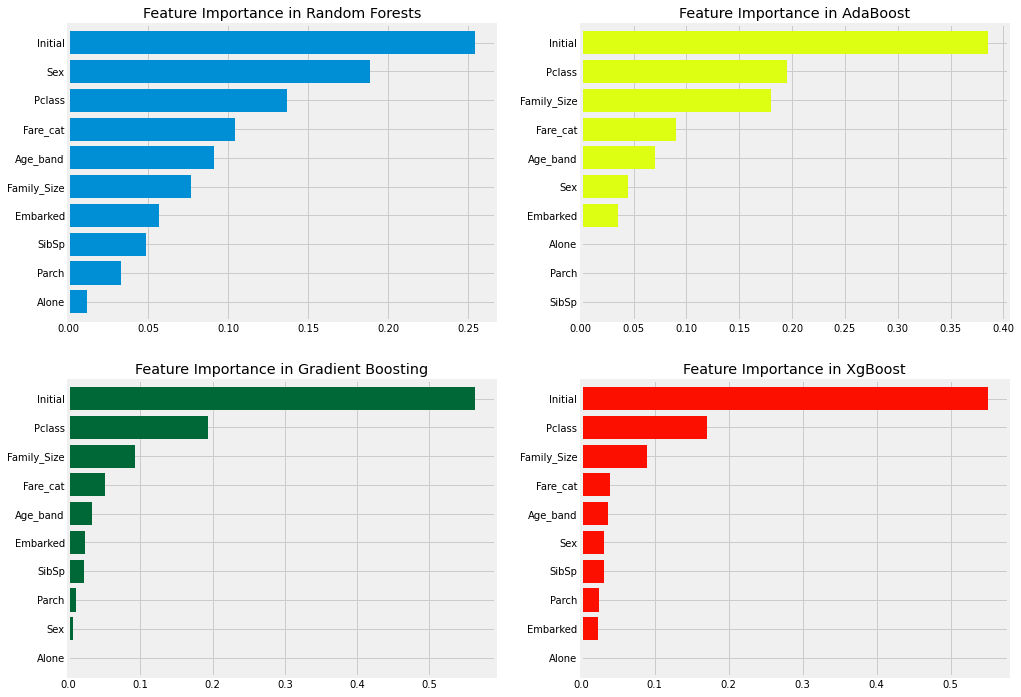

In [83]:
f, ax = plt.subplots(2,2,figsize=(15,12))

#RandomForest
model=RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

#AdaBoost
model=AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

#Gradient Boosting
model=GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

#XgBoost
model=xg.XGBClassifier(n_estimators=900, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

# Obsrvavtion

1. Initial, Fare_cat, Pclass, Family_Size 등이 일부 중요한 특성이다.

2. 이전에 Sex와 Pclass의 결합이 매우 좋은 구분 요소가 된다는 것을 확인했으나 Sex 특성이 RandomForests에서만 중요해 보인다.
 그러나 많은 분류기에서 Initial 특성이 상위에 있는 것을 볼 수 있다. 이미 Sex와 Initial 간의 양의 상관관계를 확인했기 때문에 두 특성은 모두 성별을 의미하고 있는 것을 유의해야 한다.

3. 마찬가지로 Pclass와 Fare_cat은 승객의 지위를 나타내며, Family_Size, Alone, Parch 및 SibSp와 관련이 있다.